# **Differences in Squirrel Behavior by Fur Color in Central Park**

This research will be testing the hypothesis that there is no difference between Eastern gray squirrels (*Sciurus carolinensis*) in New York City’s Central Park with different primary fur colors with regards to their willingness to approach humans. The dataset comprises 3,023 rows, each representing an individual squirrel, and I will be looking at four of the 31 columns in the dataset (primary fur color, approaches, indifferent, and runs from). It was collected in October 2018 by the Squirrel Census, with the help of 323 volunteer Squirrel Sighters, as well as The Explorers Club, NYU Department of Environmental Studies, Macaulay Honors College, the Central Park Conservancy, and New York City Department of Parks & Recreation. It is located at https://data.cityofnewyork.us/Environment/2018-Squirrel-Census-Fur-Color-Map/fak5-wcft.

# **Differences in Squirrel Behavior by Fur Color in Central Park**

### **Glenn Schexnayder**
### **December 31, 2019**

- What?
    - Willingness to approach according to primary fur color.

- Where?
    - New York City's Central Park

- When?
    - October 2018

- Who?
    - Squirrel Census

- How?
    - Various volunteers, including student groups

In [6]:
# Import dependencies and read in the data.

import pandas
import numpy
from matplotlib import pyplot
from scipy import stats
import math
import seaborn
from matplotlib.ticker import FuncFormatter

squirrels = pandas.read_csv('C:\\Users\\gsche\\Downloads\\2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

# Get information about the data

squirrels.info()
squirrels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
X                                             3023 non-null float64
Y                                             3023 non-null float64
Unique Squirrel ID                            3023 non-null object
Hectare                                       3023 non-null object
Shift                                         3023 non-null object
Date                                          3023 non-null int64
Hectare Squirrel Number                       3023 non-null int64
Age                                           2902 non-null object
Primary Fur Color                             2968 non-null object
Highlight Fur Color                           1937 non-null object
Combination of Primary and Highlight Color    3023 non-null object
Color notes                                   182 non-null object
Location                                      2959 non-null object
Above Ground Sighter Me

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


In [7]:
# Get the relevant columns with only rows that have non-null values for fur color
# and rename the columns to fit with Python naming conventions.

squirrels_trimmed = squirrels.rename(columns={'Primary Fur Color': 'primary_fur_color', 'Approaches': 'approaches', 'Indifferent': 'indifferent', 'Runs from': 'runs_from'})[['primary_fur_color', 'approaches', 'indifferent', 'runs_from']].dropna()
print(squirrels_trimmed.info())
squirrels_trimmed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 1 to 3022
Data columns (total 4 columns):
primary_fur_color    2968 non-null object
approaches           2968 non-null bool
indifferent          2968 non-null bool
runs_from            2968 non-null bool
dtypes: bool(3), object(1)
memory usage: 55.1+ KB
None


,primary_fur_color,approaches,indifferent,runs_from
1,Gray,False,False,True
2,Cinnamon,False,True,False
3,Gray,False,False,True
5,Gray,False,False,False
6,Gray,False,True,False


### **Methodology**

I will first explore the data through descriptive statistics and data visualizations. From there I will conduct a series of pairwise t-tests to test the hypothesis that there is no difference in the Eastern gray squrirrel population between different fur colors in how willing they are to approach humans.

- Why?
    - To determine what behaviors are different between subgroups of Eastern gray squirrels so biologists can focus further study to determine underlying causes

### **Audience**

This study will be of interest to anyone who would like to understand more about the Eastern gray squirrel, including biologists who might want to see what role fur color might play in their evolution. A correlation between fur color and willingness to approach humans could mean something about how fur color was selected for by the environment, which would lead to interesting questions about what factors would be involved.

Primary Fur Color has some null values, so I'll have to exclude those from the analysis.

## What does the distribution of primary fur color for Eastern gray squirrels look like?

Below are the little guys we're talking about. They're all Eastern gray squirrels, but they have different pigmentation that leads to the different primary fur colors.

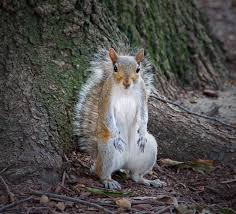

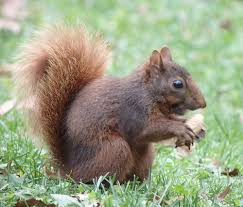

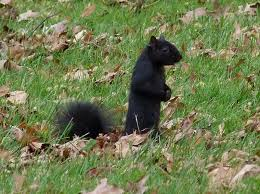

In [61]:
fur_counts = pandas.DataFrame(squirrels_trimmed['primary_fur_color'].value_counts())
fur_counts

,primary_fur_color
Gray,2473
Cinnamon,392
Black,103


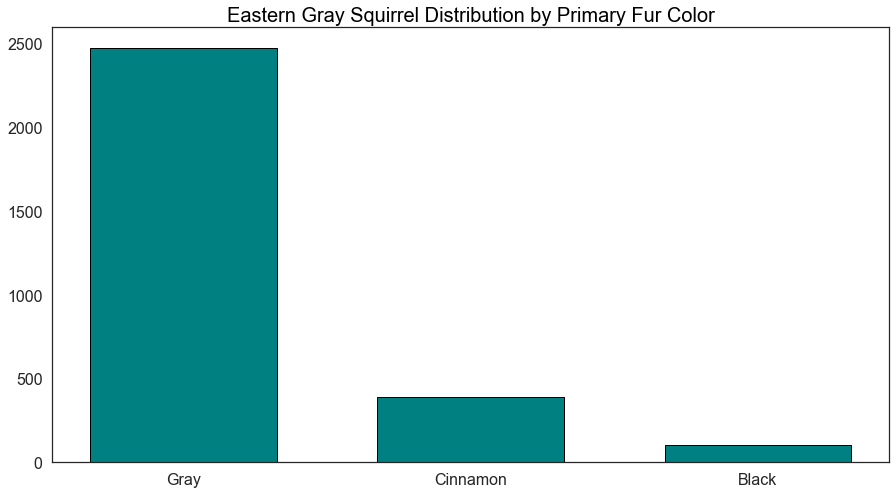

In [71]:
# Get the unique values for Primary Fur Color and check the distribution.

seaborn.set(rc={'figure.figsize':(15, 8)})
seaborn.set_style('white')
x = numpy.arange(3)
y = numpy.arange(0, 3000, 500)

fig, ax = pyplot.subplots()
pyplot.bar(x, squirrels_trimmed['primary_fur_color'].value_counts(), 0.65, color='teal', edgecolor='black')
pyplot.xticks(x, ('Gray', 'Cinnamon', 'Black'), fontsize=16)
pyplot.yticks(y, fontsize=16)
pyplot.title('Eastern Gray Squirrel Distribution by Primary Fur Color', fontsize=20, color='black')
pyplot.show()

Now that I've dropped the null values from the primary_fur_color, I can see that there are three unique values: gray, cinnamon, and black. I've also gotten the counts of each, and can see that by far, gray is the most common primary fur color. The other two are still greater than 60, however, so they easily meet the threshold for comparing means with t-tests.

## What do the ratios of behaviors in each of these subgroups look like?

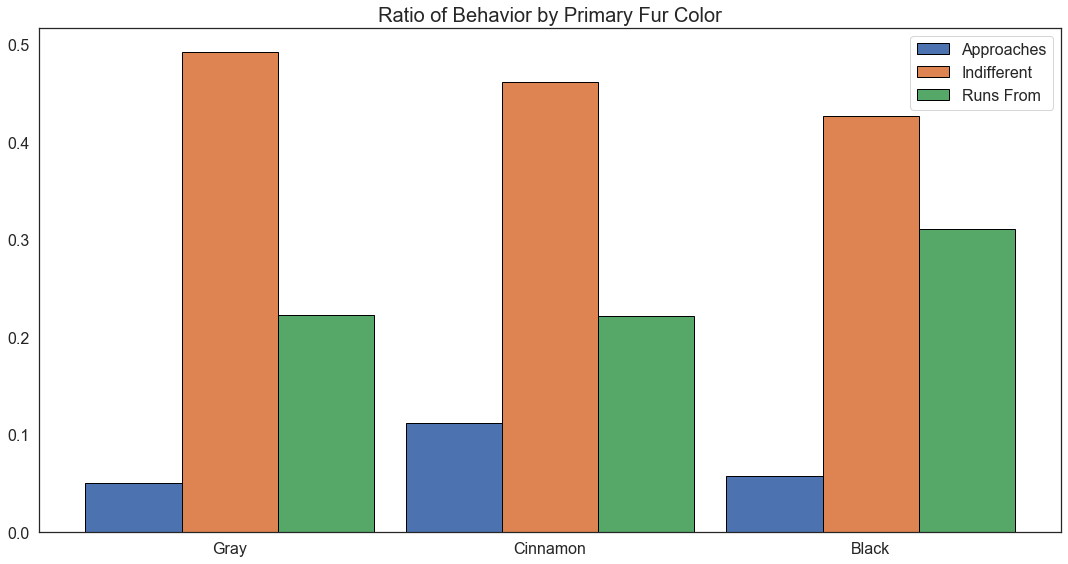

In [70]:
# Convert the boolean values to integer values.
squirrels_trimmed['approaches'] = squirrels_trimmed['approaches'].astype(int)
squirrels_trimmed['indifferent'] = squirrels_trimmed['indifferent'].astype(int)
squirrels_trimmed['runs_from'] = squirrels_trimmed['runs_from'].astype(int)

# Create separate dataframes for the different primary fur colors.
squirrels_gray = squirrels_trimmed[squirrels_trimmed.primary_fur_color=='Gray']
squirrels_cinnamon = squirrels_trimmed[squirrels_trimmed.primary_fur_color=='Cinnamon']
squirrels_black = squirrels_trimmed[squirrels_trimmed.primary_fur_color=='Black']

seaborn.set(rc={'figure.figsize':(15, 8)})
seaborn.set_style('white')
labels = ['Gray', 'Cinnamon', 'Black']
approaches_means = [squirrels_gray['approaches'].mean(), squirrels_cinnamon['approaches'].mean(), squirrels_black['approaches'].mean()]
indifferent_means = [squirrels_gray['indifferent'].mean(), squirrels_cinnamon['indifferent'].mean(), squirrels_black['indifferent'].mean()]
runs_from_means = [squirrels_gray['runs_from'].mean(), squirrels_cinnamon['runs_from'].mean(), squirrels_black['runs_from'].mean()]
x = numpy.arange(len(labels))
y = numpy.arange(0, 0.6, 0.1).round(decimals=1)
fig, ax = pyplot.subplots()
rects1 = ax.bar(x - 0.3, approaches_means, 0.3, label='Approaches', edgecolor='black')
rects2 = ax.bar(x, indifferent_means, 0.3, label='Indifferent', edgecolor='black')
rects3 = ax.bar(x + 0.3, runs_from_means, 0.3, label='Runs From', edgecolor='black')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.set_yticklabels(y, fontsize=16)
ax.legend(fontsize=16)
ax.set_title('Ratio of Behavior by Primary Fur Color', fontsize=20)
fig.tight_layout()
pyplot.show()

Interestingly, at first glance, it appears as though cinnamon-colored squirrels are the most likely to approach humans, and black-colored squirrels are most likely to run away. Now I'll perform the t-tests to check for statistical significance.

## Are these differences significant?

In [14]:
print(stats.ttest_ind(squirrels_gray['approaches'], squirrels_cinnamon['approaches']))
print(stats.ttest_ind(squirrels_gray['approaches'], squirrels_black['approaches']))
print(stats.ttest_ind(squirrels_cinnamon['approaches'], squirrels_black['approaches']),'\n')

print(stats.ttest_ind(squirrels_gray['indifferent'], squirrels_cinnamon['indifferent']))
print(stats.ttest_ind(squirrels_gray['indifferent'], squirrels_black['indifferent']))
print(stats.ttest_ind(squirrels_cinnamon['indifferent'], squirrels_black['indifferent']),'\n')

print(stats.ttest_ind(squirrels_gray['runs_from'], squirrels_cinnamon['runs_from']))
print(stats.ttest_ind(squirrels_gray['runs_from'], squirrels_black['runs_from']))
print(stats.ttest_ind(squirrels_cinnamon['runs_from'], squirrels_black['runs_from']),'\n')

Ttest_indResult(statistic=-4.7898015991318825, pvalue=1.7544319563793358e-06)
Ttest_indResult(statistic=-0.32919870705239435, pvalue=0.7420322831634318)
Ttest_indResult(statistic=1.6192170506268366, pvalue=0.1060400642763622) 

Ttest_indResult(statistic=1.1475789849396745, pvalue=0.2512382932225437)
Ttest_indResult(statistic=1.3075819163109048, pvalue=0.19113193070132273)
Ttest_indResult(statistic=0.6256554441686302, pvalue=0.5318304839011243) 

Ttest_indResult(statistic=0.03834257199787577, pvalue=0.9694172214307728)
Ttest_indResult(statistic=-2.0891607682656534, pvalue=0.03679123430135579)
Ttest_indResult(statistic=-1.878407495470714, pvalue=0.06091533773539373) 



In [15]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(squirrels_gray['approaches'], squirrels_cinnamon['approaches']))
print(get_95_ci(squirrels_gray['runs_from'], squirrels_black['runs_from']))

The difference in means at the 95% confidence interval (two-tail) is between 0.02882660533508119 and 0.09376266490597115.
The difference in means at the 95% confidence interval (two-tail) is between -0.00342223002253092 and 0.1791688370679417.


In most cases, no, but...

3 to 9 point difference at 95% confidence between gray-colored and cinnamon-colored squirrels as to whether they'll approach.

From the series of pairwise t-tests, we can see that at the 0.05 significance level, there are differences between gray-colored and cinnamon-colored squirrels in their propensity to approach humans, and between gray-colored and black-colored squirrels in their propensity to run away from humans, but there are no significant differences between any of the other groups in any of the other categories. Generating 95% confidence intervals, however, shows that there is not a difference between gray- and black-colored squirrels with regard to their propensity to run away from humans, so it appears that we only have evidence between the gray- and cinnamon-colored squirrels with regard to their willingness to approach humans.

## **What does this mean?**

There may be differences in the general population of Eastern gray squirrels as to how willing they are to approach humans depending on their fur color. The statistical tests show that there are reasons to believe that Eastern gray squirrels with a primary fur color of gray are more likely to approach humans than those with cinnamon as a primary fur color, and this may be due to some selection pressures based on the environment and how it interacts with their primary fur colors. On the other hand, it could be due to issues with the way the data was collected, since there were rows where all three values were false, which doesn't seem logically possible. It may be worth looking into further, just to make sure that the differences weren't due to anomalies in the data collection methods, but it seems like it would be pretty far down in priority.

## **What does this mean?**

- Statistically significant difference between gray-colored and cinnamon-colored Eastern gray squirrels in willingness to approach humans.

- Focus should be on gray- and cinnamon-colored squirrels to determine causes of behavioral differences

## **Questions for further study:**

- Genetic?

- Environmental?

- Similar in other locations?

- Cultural?

# **Questions?**